In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# Load the CSV file
df = pd.read_csv('bear_attacks.csv')
# Display the first few rows of the DataFrame
print(df.head())


                Date                    Location  \
0    August 23, 2018       Lyon Inlet, Nunavut     
1       July 3, 2018      Sentry Island, Nunavut   
2       July 9, 1999  near Rankin Inlet, Nunavut   
3   December 8, 1990           Point Lay, Alaska   
4  November 29, 1983         Churchill, Manitoba   

                                             Details   Bear   Latitude  \
0  Three men from Naujaat, whose boat had broken ...  Polar  66.534160   
1  A polar bear approached a man and his children...  Polar  61.167230   
2  Amitnak was mauled after trying to distract a ...  Polar  62.808913   
3  While Stalker was walking with his girlfriend,...  Polar  69.742800   
4  Mutanen was attacked and dragged on a street i...  Polar  58.767755   

    Longitude            Name  Age   Gender  
0  -83.882170   Darryl Kaunak   33     male  
1  -93.850150   Aaron Gibbons   31     male  
2  -92.087741  Hattie Amitnak   64   female  
3 -163.011250    Carl Stalker   28     male  
4  -94.16399

In [7]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       156 non-null    object 
 1   Location   156 non-null    object 
 2   Details    156 non-null    object 
 3   Bear       156 non-null    object 
 4   Latitude   156 non-null    float64
 5   Longitude  156 non-null    float64
 6   Name       155 non-null    object 
 7   Age        155 non-null    object 
 8   Gender     155 non-null    object 
dtypes: float64(2), object(7)
memory usage: 11.1+ KB
None
         Latitude   Longitude
count  156.000000  156.000000
mean    51.014942 -113.889579
std      8.825507   22.993165
min     28.647838 -163.011250
25%     45.250210 -124.686183
50%     49.814079 -113.780475
75%     58.416670 -105.525439
max     69.742800  -66.825422


In [8]:
# Check for missing values
print(df.isnull().sum())


Date         0
Location     0
Details      0
Bear         0
Latitude     0
Longitude    0
Name         1
Age          1
Gender       1
dtype: int64


In [12]:
# Print the column names
print(df.columns)


Index(['Date', 'Location', 'Details', 'Bear', 'Latitude', 'Longitude', 'Name',
       'Age', 'Gender'],
      dtype='object')


In [21]:
# Highest bear attack location
# Ensure 'Location' column exists
if 'Location' in df.columns:
    # Group by 'Location' and count the number of attacks
    location_attack_counts = df.groupby('Location').size().reset_index(name='Attack_Count')

    # Sort the locations by the number of attacks in descending order
    sorted_attack_counts = location_attack_counts.sort_values(by='Attack_Count', ascending=False)

    # Display the location with the highest bear attack rate
    highest_attack_rate_location = sorted_attack_counts.iloc[0]
    print("Location with the highest bear attack rate:")
    print(highest_attack_rate_location)
else:
    print("Column 'Location' does not exist in the DataFrame")


Location with the highest bear attack rate:
Location        Glacier National Park, Montana
Attack_Count                                10
Name: 28, dtype: object


In [22]:
# Lowest bear attack area
# Load the CSV file into a DataFrame
df = pd.read_csv('bear_attacks.csv')

# Ensure 'Location' column exists
if 'Location' in df.columns:
    # Group by 'Location' and count the number of attacks
    location_attack_counts = df.groupby('Location').size().reset_index(name='Attack_Count')

    # Filter out locations with zero attacks if necessary (assuming each location in the DataFrame has at least one attack)
    # Sort the locations by the number of attacks in ascending order
    sorted_attack_counts = location_attack_counts.sort_values(by='Attack_Count', ascending=True)

    # Display the location(s) with the lowest bear attack rate
    lowest_attack_rate_location = sorted_attack_counts.iloc[0]
    print("Location with the lowest bear attack rate:")
    print(lowest_attack_rate_location)
else:
    print("Column 'Location' does not exist in the DataFrame")


Location with the lowest bear attack rate:
Location        Bridger-Teton National Forest, Wyoming
Attack_Count                                         1
Name: 8, dtype: object


In [25]:
import pandas as pd
import folium

# Load the CSV file into a DataFrame
df = pd.read_csv('bear_attacks.csv')

# Ensure 'Location', 'Latitude', and 'Longitude' columns exist
if {'Location', 'Latitude', 'Longitude'}.issubset(df.columns):
    # Group by 'Location' and count the number of attacks
    location_attack_counts = df.groupby('Location').size().reset_index(name='Attack_Count')

    # Merge the attack counts back to the original dataframe to get coordinates
    df = pd.merge(df, location_attack_counts, on='Location', how='left')

    # Find the highest and lowest attack rate locations
    highest_attack_rate_location = df.loc[df['Attack_Count'].idxmax()]
    lowest_attack_rate_location = df.loc[df['Attack_Count'].idxmin()]

    # Create a base map centered around the mean latitude and longitude
    map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
    bear_attack_map = folium.Map(location=map_center, zoom_start=5)

    # Add a marker for the highest attack rate location
    folium.Marker(
        location=[highest_attack_rate_location['Latitude'], highest_attack_rate_location['Longitude']],
        popup=f"Highest Attack Rate\nLocation: {highest_attack_rate_location['Location']}\nAttacks: {highest_attack_rate_location['Attack_Count']}",
        icon=folium.Icon(color='red')
    ).add_to(bear_attack_map)

    # Add a marker for the lowest attack rate location
    folium.Marker(
        location=[lowest_attack_rate_location['Latitude'], lowest_attack_rate_location['Longitude']],
        popup=f"Lowest Attack Rate\nLocation: {lowest_attack_rate_location['Location']}\nAttacks: {lowest_attack_rate_location['Attack_Count']}",
        icon=folium.Icon(color='green')
    ).add_to(bear_attack_map)

    # Save the map to an HTML file
    bear_attack_map.save('bear_attack_map.html')
    print("Map has been created and saved as 'bear_attack_map.html'.")
else:
    print("Required columns 'Location', 'Latitude', or 'Longitude' do not exist in the DataFrame")


Map has been created and saved as 'bear_attack_map.html'.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       143 non-null    datetime64[ns]
 1   Location   156 non-null    object        
 2   Details    156 non-null    object        
 3   Bear       156 non-null    object        
 4   Latitude   156 non-null    float64       
 5   Longitude  156 non-null    float64       
 6   Name       156 non-null    object        
 7   Age        156 non-null    object        
 8   Gender     156 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 11.1+ KB
None
                                Date    Latitude   Longitude
count                            143  156.000000  156.000000
mean   1982-10-30 09:54:07.552447552   51.014942 -113.889579
min              1837-10-17 00:00:00   28.647838 -163.011250
25%              1974-06-24 12:00:00   45.250210 -124.6861

/var/folders/lx/4rt8gjpx3tndjbrqc3j96cr80000gp/T/ipykernel_18571/2226113795.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bear_counts.index, y=bear_counts.values, palette='plasma')


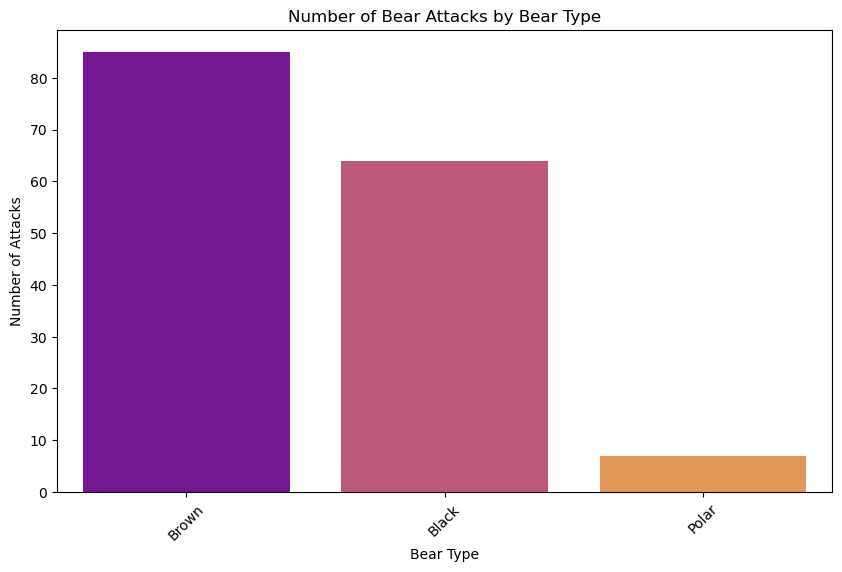

The bear type with the highest attack rate is 'Brown' with 85 attacks.


In [29]:
# Convert Date column to DateTime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Fill missing values
df = df.fillna({'Name': 'Unknown', 'Age': 'Unknown', 'Gender': 'Unknown'})

# Display DataFrame information
print(df.info())

# Display basic statistics
print(df.describe())

# Count the occurrences of each type of bear
bear_counts = df['Bear'].value_counts()

# Display the bear counts
print(bear_counts)

# Plot the frequency of bear attacks by bear type
plt.figure(figsize=(10, 6))
sns.barplot(x=bear_counts.index, y=bear_counts.values, palette='plasma')
plt.title('Number of Bear Attacks by Bear Type')
plt.xlabel('Bear Type')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.show()

# Identify the bear type with the highest attack rate
most_common_bear = bear_counts.idxmax()
most_common_bear_count = bear_counts.max()

print(f"The bear type with the highest attack rate is '{most_common_bear}' with {most_common_bear_count} attacks.")


In [30]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# Load the CSV file
df = pd.read_csv('bear_attacks.csv')

# Convert Date column to DateTime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Fill missing values
df = df.fillna({'Name': 'Unknown', 'Age': 'Unknown', 'Gender': 'Unknown'})

# Create a base map
m = folium.Map(location=[51.0, -114.0], zoom_start=4)

# Create a marker cluster
marker_cluster = MarkerCluster().add_to(m)

# Define a color dictionary for bear types
color_dict = {
    'Grizzly Bear': 'red',
    'Black Bear': 'blue',
    'Polar Bear': 'green',
    'Unknown Bear Type': 'gray'
}

# Add markers to the map
for idx, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=(
            f"Date: {row['Date']}<br>"
            f"Location: {row['Location']}<br>"
            f"Bear: {row['Bear']}<br>"
            f"Details: {row['Details']}<br>"
            f"Name: {row['Name']}<br>"
            f"Age: {row['Age']}<br>"
            f"Gender: {row['Gender']}"
        ),
        icon=folium.Icon(color=color_dict.get(row['Bear'], 'black'))
    ).add_to(marker_cluster)

# Save the map to an HTML file
m.save('bear_attacks_map.html')

print("Map has been saved to bear_attacks_map.html")


Map has been saved to bear_attacks_map.html


/var/folders/lx/4rt8gjpx3tndjbrqc3j96cr80000gp/T/ipykernel_18571/397351714.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bear_counts.index, y=bear_counts.values, ax=ax[1], palette='plasma')


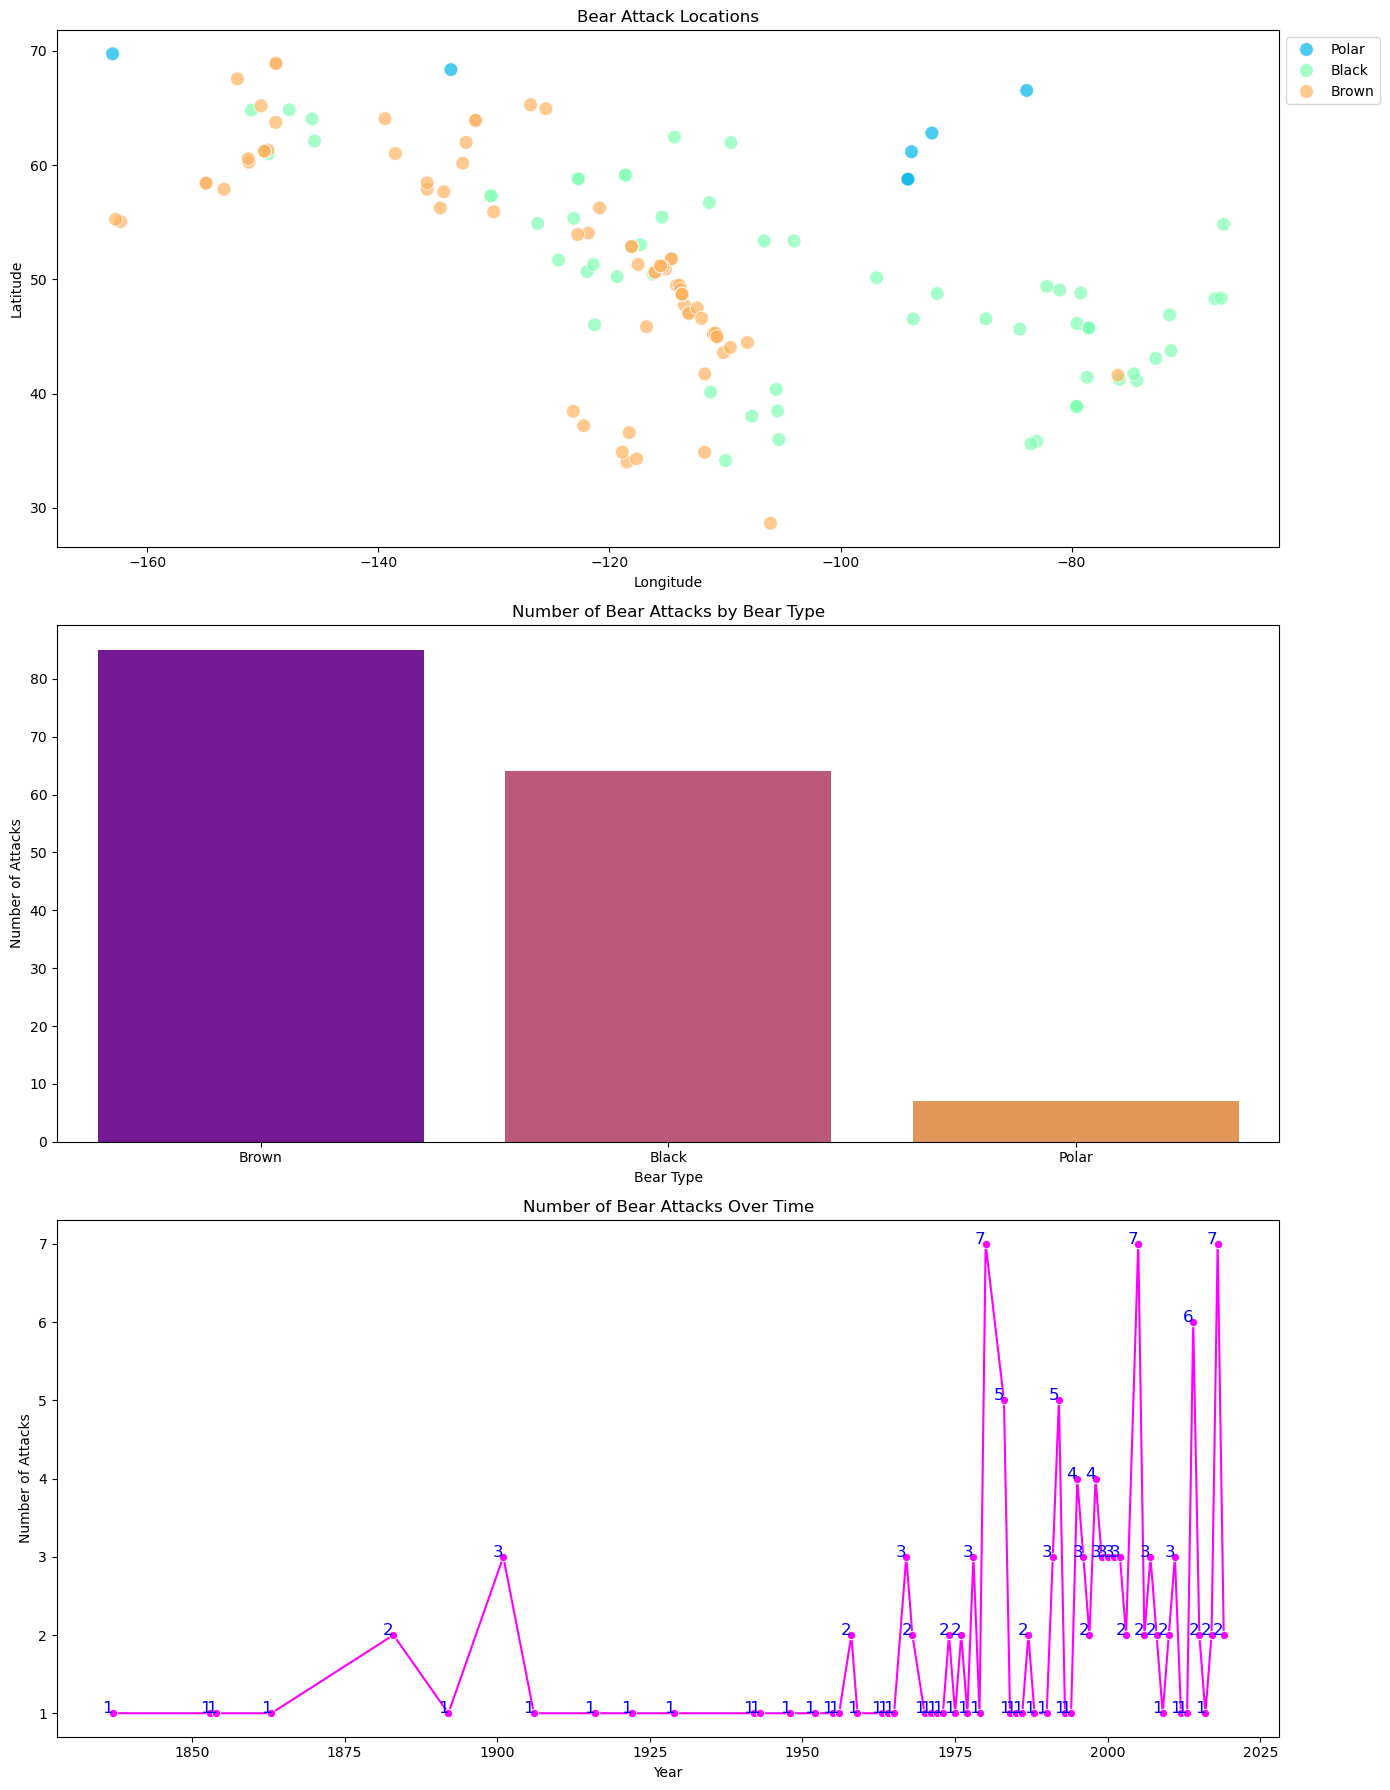

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('bear_attacks.csv')

# Convert Date column to DateTime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Fill missing values
df = df.fillna({'Name': 'Unknown', 'Age': 'Unknown', 'Gender': 'Unknown'})

# Create a Year column for time-series analysis
df['Year'] = df['Date'].dt.year

# Set up the figure and axes
fig, ax = plt.subplots(3, 1, figsize=(14, 18))

# Scatter plot of latitude and longitude
sns.scatterplot(x='Longitude', y='Latitude', hue='Bear', data=df, ax=ax[0], palette='rainbow', s=100, edgecolor='w', alpha=0.7)
ax[0].set_title('Bear Attack Locations')
ax[0].legend(loc='upper left', bbox_to_anchor=(1, 1))

# Bar plot of bear attack counts by bear type
bear_counts = df['Bear'].value_counts()
sns.barplot(x=bear_counts.index, y=bear_counts.values, ax=ax[1], palette='plasma')
ax[1].set_title('Number of Bear Attacks by Bear Type')
ax[1].set_xlabel('Bear Type')
ax[1].set_ylabel('Number of Attacks')

# Line plot showing the number of attacks over time
attacks_per_year = df['Year'].value_counts().sort_index()
sns.lineplot(x=attacks_per_year.index, y=attacks_per_year.values, ax=ax[2], marker='o', linestyle='-', color='magenta')
ax[2].set_title('Number of Bear Attacks Over Time')
ax[2].set_xlabel('Year')
ax[2].set_ylabel('Number of Attacks')

# Add some annotations to make it look crazier
for i, value in enumerate(attacks_per_year.values):
    ax[2].text(attacks_per_year.index[i], value, str(value), fontsize=12, color='blue', ha='right')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
